# MAC0460 / MAC5832 (2020)
<hr>

## EP2: linear regression, analytic solution
### Felipe Castro de Noronha | 10737032
---
### Goals:

- to implement and test the analytic solution for the linear regression task (see, for instance, <a href="http://work.caltech.edu/slides/slides03.pdf">Slides of Lecture 03</a> and Lecture 03 of *Learning from Data*)
- to understand the core idea (*optimization of a loss or cost function*) for parameter adjustment in machine learning

This notebook makes use of additional auxiliary functions in <t>util/</t>
<hr>

# Linear regression

Given a dataset $\{(\mathbf{x}^{(1)}, y^{(1)}), \dots ,(\mathbf{x}^{(N)}, y^{(N)})\}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$ and $y^{(i)} \in \mathbb{R}$, we would like to approximate the unknown function $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ (recall that $y^{(i)} =f(\mathbf{x}^{(i)})$) by means of a linear model $h$:
$$
h(\mathbf{x}^{(i)}; \mathbf{w}, b) = \mathbf{w}^\top  \mathbf{x}^{(i)} + b
$$

Note that $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ is, in fact, an  [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) of  $\mathbf{x}^{(i)}$. As commonly done, we will use the term "linear" to refer to an affine transformation.

The output of $h$ is a linear transformation of $\mathbf{x}^{(i)}$. We use the notation $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ to make clear that $h$ is a parametric model, i.e., the transformation $h$ is defined  by the parameters $\mathbf{w}$ and $b$. We can view vector $\mathbf{w}$ as a *weight* vector that controls the effect of each *feature* in the prediction.

By adding one component with value equal to 1 to the observations $\mathbf{x}^{(i)}$ -- artificial coordinate -- we can simplify the notation:

$$
h(\mathbf{x}^{(i)}; \mathbf{w}) = \hat{y}^{(i)} = \mathbf{w}^\top  \mathbf{x}^{(i)}
$$

We would like to determine the optimal parameters $\mathbf{w}$ such that prediction $\hat{y}^{(i)}$ is as closest as possible to $y^{(i)}$ according to some error metric. Adopting the *mean square error* as such metric we have the following cost function:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}\big(\hat{y}^{(i)} - y^{(i)}\big)^{2}
\end{equation}

Thus, the task of determining a function $h$ that is closest to $f$ is reduced to the task of finding the values $\mathbf{w}$ that minimizes $J(\mathbf{w})$.

**Now we will explore this model, starting with a simple dataset.**


### Import auxiliary functions

In [0]:
# all imports
import numpy as np
import time

# changed to work on colab
from util import get_housing_prices_data, r_squared
from plots import plot_points_regression 

%matplotlib inline

### The dataset 

The first dataset we will use is a toy dataset. We will generate $N=100$ observations with only one *feature* and a real value associated to each of them. We can view these observations as being pairs *(area of a real state in square meters, price of the real state)*. Our task is to construct a model that is able to predict the price of a real state, given its area.

In [3]:
X, y = get_housing_prices_data(N=100)


X shape = (100, 1)

y shape = (100, 1)

X:
mean 645.0, sdt 323.65, max 1200.0, min 90.0

y:
mean 44226.1484375, sdt 17286.49, max 79626.4296875, min 11424.0576171875


### Ploting the data

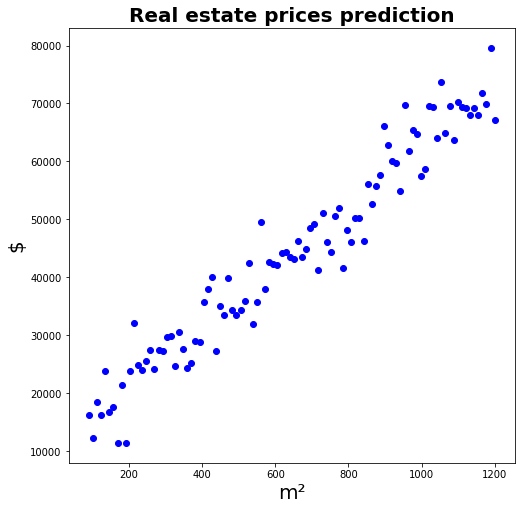

In [4]:
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$')

### The solution

Given $f:\mathbb{R}^{N\times d} \rightarrow \mathbb{R}$ and $\mathbf{A} \in \mathbb{R}^{N\times d}$, we define the gradient of $f$ with respect to $\mathbf{A}$ as:

\begin{equation*}
\nabla_{\mathbf{A}}f = \frac{\partial f}{\partial \mathbf{A}} =  \begin{bmatrix}
\frac{\partial f}{\partial \mathbf{A}_{1,1}} & \dots & \frac{\partial f}{\partial \mathbf{A}_{1,m}} \\
\vdots &  \ddots & \vdots \\
\frac{\partial f}{\partial \mathbf{A}_{n,1}} &  \dots & \frac{\partial f}{\partial \mathbf{A}_{n,m}}
\end{bmatrix}
\end{equation*}

Let $\mathbf{X} \in \mathbb{R}^{N\times d}$ be a matrix whose rows are the observations of the dataset (sometimes also called the *design matrix*) and let $\mathbf{y} \in \mathbb{R}^{N}$ be the vector consisting of all values of $y^{(i)}$ (i.e., $\mathbf{X}^{(i,:)} = \mathbf{x}^{(i)}$ and $\mathbf{y}^{(i)} = y^{(i)}$). It can be verified that: 

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}

Using basic matrix derivative concepts we can compute the gradient of $J(\mathbf{w})$ with respect to $\mathbf{w}$:

\begin{equation}
\nabla_{\mathbf{w}}J(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{X}\mathbf{w} -\mathbf{X}^{T}\mathbf{y})   
\end{equation}

Thus, when $\nabla_{\mathbf{w}}J(\mathbf{w}) = 0$ we have 

\begin{equation}
\mathbf{X}^{T}\mathbf{X}\mathbf{w} = \mathbf{X}^{T}\mathbf{y}
\end{equation}

Hence,

\begin{equation}
\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
\end{equation}

Note that this solution has a high computational cost. As the number of variables (*features*) increases, the cost for matrix inversion becomes prohibitive. See  [this text](http://cs229.stanford.edu/notes/cs229-notes1.pdf) for more details.

## Exercise 1
Using only **NumPy** (a quick introduction to this library can be found  [here](http://cs231n.github.io/python-numpy-tutorial/)), complete the two functions below. Recall that $\mathbf{X} \in \mathbb{R}^{N\times d}$; thus you will need to add a component of value 1 to each of  the observations in $\mathbf{X}$ before performing the computation described above.

NOTE: Although the dataset above has data of dimension $d=1$, your code must be generic (it should work for $d\geq1$)

In [0]:
def normal_equation_weights(X, y):
    """
    Calculates the weights of a linear function using the normal equation method.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(d+1, 1))
    """
    
    # START OF YOUR CODE:
    
    # X matrix with ones in the beggining of each observation
    X_add = np.hstack((np.ones((X.shape[0],1)), X)) 

    # Mutiplication of X and its transpose
    X_m = np.dot(X_add.T, X_add)
    
    # Inverse of multiplication
    X_mi = np.linalg.inv(X_m)

    # Result
    w = np.dot(np.dot(X_mi, X_add.T), y)

    # END YOUR CODE

    return w

In [6]:
# test of function normal_equation_weights()

w = 0  # this is not necessary
w = normal_equation_weights(X, y)
print("Estimated w = ", w)

Estimated w =  [[10780.47053564]
 [   51.85376504]]


In [0]:
def normal_equation_prediction(X, w):
    """
    Calculates the prediction over a set of observations X using the linear function
    characterized by the weight vector w.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weight vector
    :type w: np.ndarray(shape=(d+1, 1))
    :param y: regression prediction
    :type y: np.ndarray(shape=(N, 1))
    """
    
    # START OF YOUR CODE:
    
    # X matrix with ones in the beggining of each observation
    X_add = np.hstack((np.ones((X.shape[0],1)), X)) 

    # Results with generated weights
    prediction = np.dot(X_add, w)
    
    # END YOUR CODE
    
    return prediction


You can use the [$R^2$](https://pt.wikipedia.org/wiki/R%C2%B2) metric to evaluate how well the linear model fits the data.

**It is expected that $𝑅^2$ is a value close to 0.5.**

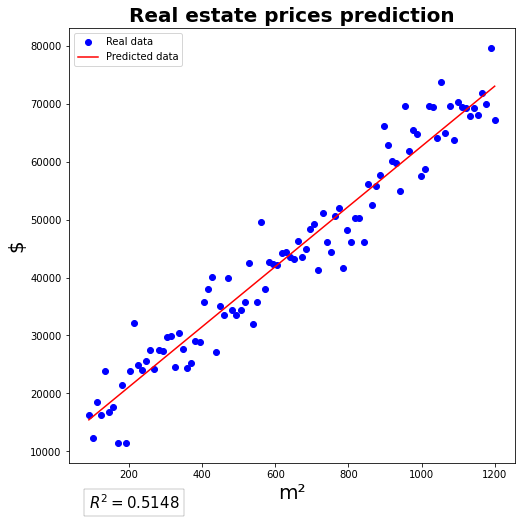

In [8]:
# test of function normal_equation_prediction()
prediction = normal_equation_prediction(X, w)
r_2 = r_squared(y, prediction)
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$',
                       prediction=prediction,
                       legend=True,
                       r_squared=r_2)

## Additional tests

Let us compute a prediction for $x=650$


In [9]:
# Let us use the prediction function
x = np.asarray([650]).reshape(1,1)
prediction = normal_equation_prediction(x, w)
print("Area = %.2f  Predicted price = %.4f" %(x[0], prediction))

# another way of computing the same
y = np.dot(np.asarray((1,x)), w)
print("Area = %.2f  Predicted price = %.4f" %(x, y))


Area = 650.00  Predicted price = 44485.4178
Area = 650.00  Predicted price = 44485.4178


## Exercise 2: Effect of the number of samples

Change the number of samples $N$ and observe how processing time varies.

In [10]:
# Testing different values for N
X, y = get_housing_prices_data(N=1000000)
init = time.time()
w = normal_equation_weights(X, y)
prediction = normal_equation_prediction(X,w)
init = time.time() - init

print("Execution time = {:.8f}(s)".format(init))


X shape = (1000000, 1)

y shape = (1000000, 1)

X:
mean 645.0000610351562, sdt 320.43, max 1200.0, min 90.0

y:
mean 44255.5546875, sdt 16519.12, max 88784.109375, min 489.04248046875
Execution time = 0.02934265(s)


Executei este notebook na ferramenta Colab, da Google. Os tempos obtidos foram os seguintes:

*   N = 100 -> Execution time = 0.00313520(s)
*   N = 1000 -> Execution time = 0.00441623(s)
*   N = 10000 -> Execution time = 0.00300860(s)
*   N = 100000 -> Execution time = 0.00449181(s)
*   N = 1000000 -> Execution time = 0.02990961(s)
*   N = 10000000 -> Execution time = 0.29920363(s)

Para N = 100000000 não consegui executar o algoritmo.




## Exercise 2: Effect of the data dimension

Test your code for data with $𝑑>1$. You can create your own dataset (if you do so, you can share the code by posting it to the moodle's Forum -- only the code for the dataset generation!). If you have no idea on how to generate such dataset, you can use existing datasets such as the 
 one in scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

If you used an existing dataset or one generated by a colleague, please acknowledge the fact clearly. Thanks!

### Dataset 1: boston house-prices

Para o meu primeiro teste com o caso multidimensional, usarei o dataset [aqui disponivel](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston). Tal D possui 13 dimensões e 506 observações.

In [11]:
# Testing with boston house-prices dataset
# The 1's in variables names are here due to scope reasons

from sklearn.datasets import load_boston
X1, y1 = load_boston(return_X_y=True)

# Weights vector
w1 = normal_equation_weights(X1, y1)
# Predictions
p1 = normal_equation_prediction(X1, w1)

# Calculating the mean square error
J1 = ((p1 - y1)**2).mean()

print("Mean square error: " + str(J1))

# Printing some samples
print("\nComparing some values")
for i in [0, 5, 54, 76, 96, 213, 278, 376, 399, 412, 490]:
    print("Actual | predicted y = {:.2f} | {:.2f}".format(y1[i], p1[i]))


Mean square error: 21.894831181729206

Comparing some values
Actual | predicted y = 24.00 | 30.00
Actual | predicted y = 28.70 | 25.26
Actual | predicted y = 18.90 | 15.36
Actual | predicted y = 20.00 | 22.95
Actual | predicted y = 21.40 | 24.73
Actual | predicted y = 28.10 | 25.22
Actual | predicted y = 29.10 | 30.35
Actual | predicted y = 13.90 | 17.74
Actual | predicted y = 6.30 | 10.89
Actual | predicted y = 17.90 | 1.72
Actual | predicted y = 8.10 | 3.66


### Dataset 2: Diabetes

Esse segundo dataset possui 10 dimensões e 442 exemplos. Tal dados mostram a quantificação da evolução da doença 1 ano a partir das medições. A referencia pode ser consultada [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes).

In [12]:
# Testing with diabetes dataset
# The 2's in variables names are here due to scope reasons

from sklearn.datasets import load_diabetes
X2, y2 = load_diabetes(return_X_y=True)

# Weights vector
w2 = normal_equation_weights(X2, y2)
# Predictions
p2 = normal_equation_prediction(X2, w2)

# Calculating the mean square error
J2 = ((p2 - y2)**2).mean()

print("Mean square error: " + str(J2))

# Printing some samples
print("\nComparing some values")
for i in [0, 5, 54, 76, 96, 213, 278, 376, 399, 412, 440]:
    print("Actual | predicted y = {:.2f} | {:.2f}".format(y2[i], p2[i]))

Mean square error: 2859.6903987680657

Comparing some values
Actual | predicted y = 151.00 | 206.12
Actual | predicted y = 97.00 | 106.35
Actual | predicted y = 182.00 | 139.11
Actual | predicted y = 170.00 | 191.17
Actual | predicted y = 150.00 | 207.72
Actual | predicted y = 49.00 | 98.58
Actual | predicted y = 102.00 | 111.45
Actual | predicted y = 121.00 | 211.26
Actual | predicted y = 232.00 | 189.19
Actual | predicted y = 261.00 | 232.98
Actual | predicted y = 220.00 | 211.86


### Dataset 3: Heart Disease UCI

Este dataset, obtido [aqui](https://www.kaggle.com/ronitf/heart-disease-uci/data), possui 13 dimensões e 303 exemplos. Leva em contas varias caracteristicas de um paciente e diz se ele tem ou não uma doença cardiaca. 

O ideal seria usarmos uma regressão logistica para estimar a probabilidade de que dado paciente desenlvolva uma doença cardiaca, mas isso fica para proximos projetos.

In [13]:
# Reading dataset from csv into numpy matrix
data3 = np.genfromtxt('heart.csv', delimiter=',')
data3 = data3[1:]

# Extracting first 13 columns
X3 = data3[:, range(13)]
# Extracting last column
y3 = data3[:, 13]

# Weights vector
w3 = normal_equation_weights(X3, y3)
# Predictions
p3 = normal_equation_prediction(X3, w3)

# Calculating the mean square error
J3 = ((p3 - y3)**2).mean()

print("Mean square error: " + str(J3))

# Printing some samples
print("\nComparing some values")
for i in [0, 5, 34, 76, 104, 150, 170, 201, 250, 296, 301]:
    print("Actual | predicted y = {:.2f} | {:.2f}".format(y3[i], p3[i]))

Mean square error: 0.11965479756916172

Comparing some values
Actual | predicted y = 1.00 | 0.76
Actual | predicted y = 1.00 | 0.67
Actual | predicted y = 1.00 | 0.58
Actual | predicted y = 1.00 | 0.70
Actual | predicted y = 1.00 | 0.95
Actual | predicted y = 1.00 | 0.50
Actual | predicted y = 0.00 | 0.59
Actual | predicted y = 0.00 | -0.02
Actual | predicted y = 0.00 | -0.35
Actual | predicted y = 0.00 | 0.62
Actual | predicted y = 0.00 | 0.08


### Dataset 4: Insurance forecast of medical cost

O dataset obtido [aqui](https://www.kaggle.com/mirichoi0218/insurance) reune 6 dimensões entre 1338 exemplos para dizer o custo do plano de saude de um cliente. Aqui, remapiei algumas colunas do dataset original para numeros naturais.

In [14]:
# Reading dataset from csv into numpy matrix
data4 = np.genfromtxt('insurance.csv', delimiter=',')
data4 = data4[1:]

# Extracting first 6 columns
X4 = data4[:, range(6)]
# Extracting last column
y4 = data4[:, 6]

# Weights vector
w4 = normal_equation_weights(X4, y4)
# Predictions
p4 = normal_equation_prediction(X4, w4)

# Calculating the mean square error
J4 = ((p4 - y4)**2).mean()

print("Mean square error: " + str(J4))

# Printing some samples
print("\nComparing some values")
for i in [0, 100, 200, 300, 500, 600, 700, 800, 900, 1000]:
    print("Actual | predicted y = {:.2f} | {:.2f}".format(y4[i], p4[i]))

Mean square error: 36664649.486669816

Comparing some values
Actual | predicted y = 16884.92 | 25600.58
Actual | predicted y = 6186.13 | 8649.23
Actual | predicted y = 2130.68 | 3043.70
Actual | predicted y = 6746.74 | 7559.14
Actual | predicted y = 36197.70 | 30137.86
Actual | predicted y = 1633.04 | 5248.20
Actual | predicted y = 2020.55 | 4642.82
Actual | predicted y = 7046.72 | 7741.19
Actual | predicted y = 8688.86 | 7858.77
Actual | predicted y = 17361.77 | 27585.98
